In [17]:
import numpy as np
import pandas as pd
import re

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv("../data/gurgaon_properties_cleaned_v1.csv")

In [8]:
df.duplicated().sum()

np.int64(122)

In [9]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,dlf the skycourt,sector 86,1.58,8190.0,1929.0,Super Built up area 1929(179.21 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.),3,3,1,pooja room,16.0,North,1 to 5 Year Old,"['Sapphire 83 Mall', 'NH-8, Imt Manesar', 'Rao Bharat Singh International School', 'DPG Institute of Technology', 'Aarvy Healthcare', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'Aapno Ghar', 'National Tennis Academy Sector 98']","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '5 AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


**focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features**

# 1. areaWithType

In [12]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1163,2.60,1080.0,Plot area 120(100.34 sq.m.)
1453,1.10,1350.0,Carpet area: 1350 (125.42 sq.m.)
2752,1.90,1672.0,Super Built up area 1672(155.33 sq.m.)
1907,0.20,301.0,Carpet area: 301 (27.96 sq.m.)
3474,0.96,1461.0,Super Built up area 1457(135.36 sq.m.)Carpet area: 849 sq.ft. (78.87 sq.m.)


In [13]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [14]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [15]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [18]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [19]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3273,3.35,flat,1902.0,Carpet area: 1900 (176.52 sq.m.),NaN,NaN,1900.0
907,1.35,flat,1790.0,Super Built up area 1790(166.3 sq.m.),1790.0,NaN,NaN
794,0.37,house,450.0,Plot area 450(41.81 sq.m.),NaN,NaN,NaN
1511,0.56,flat,1364.0,Super Built up area 1364(126.72 sq.m.),1364.0,NaN,NaN
3203,0.95,flat,1067.0,Super Built up area 1067(99.13 sq.m.)Carpet area: 578 sq.ft. (53.7 sq.m.),1067.0,NaN,578.0


In [20]:
df.duplicated().sum()

np.int64(122)

In [21]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [22]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
4,NaN,house,NaN,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
6,0.45,house,900.0,Plot area 900(83.61 sq.m.),NaN,NaN,NaN
25,1.00,house,1215.0,Plot area 135(112.88 sq.m.),NaN,NaN,NaN
28,0.62,house,500.0,Plot area 500(46.45 sq.m.)Built Up area: 900 sq.ft. (83.61 sq.m.)Carpet area: 480 sq.ft. (44.59 sq.m.),NaN,900.0,480.0


In [23]:
df.isna().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [25]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [26]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
4,NaN,house,NaN,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
6,0.45,house,900.0,Plot area 900(83.61 sq.m.),NaN,NaN,NaN
25,1.00,house,1215.0,Plot area 135(112.88 sq.m.),NaN,NaN,NaN
31,8.25,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN


In [27]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [28]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [29]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [30]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
4,NaN,house,NaN,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
6,0.45,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
25,1.00,house,1215.0,Plot area 135(112.88 sq.m.),NaN,135.00,NaN
31,8.25,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
35,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,87.00,NaN
40,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,692.00,NaN
46,5.00,house,2367.0,Plot area 263(219.9 sq.m.),NaN,263.00,NaN
57,1.60,house,508.0,Plot area 60(50.17 sq.m.),NaN,60.00,NaN
72,3.25,house,981.0,Plot area 109(91.14 sq.m.),NaN,109.00,NaN


In [31]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [32]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [33]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
4,NaN,house,NaN,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
6,0.45,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
25,1.00,house,1215.0,Plot area 135(112.88 sq.m.),NaN,1215.00,NaN
31,8.25,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
35,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,783.00,NaN
40,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,6228.00,NaN
46,5.00,house,2367.0,Plot area 263(219.9 sq.m.),NaN,2367.00,NaN
57,1.60,house,508.0,Plot area 60(50.17 sq.m.),NaN,60.00,NaN
72,3.25,house,981.0,Plot area 109(91.14 sq.m.),NaN,981.00,NaN


In [34]:
# update the original dataframe
df.update(all_nan_df)

In [35]:
df.isna().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,dlf the skycourt,sector 86,1.58,8190.0,1929.0,Super Built up area 1929(179.21 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.),3,3,1,pooja room,16.0,North,1 to 5 Year Old,"['Sapphire 83 Mall', 'NH-8, Imt Manesar', 'Rao Bharat Singh International School', 'DPG Institute of Technology', 'Aarvy Healthcare', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'Aapno Ghar', 'National Tennis Academy Sector 98']","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '5 AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1929.0,1750.0,1450.0
1,flat,ss the leaf,sector 85,1.20,7317.0,1640.0,Super Built up area 1640(152.36 sq.m.),2,2,3,not available,12.0,South,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'NH 08', 'Pataudi Road', 'Delhi Public School Sector 84', 'DPG Institute of Technology', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park', 'Nakhrola Stadium Sector 81A']","['5 Fan', '1 Exhaust Fan', '2 Geyser', '10 Light', '4 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '2 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1640.0,NaN,NaN
2,house,ansals florence villa,sector 57,6.00,22222.0,2700.0,Plot area 300(250.84 sq.m.),4,5,2,"pooja room,servant room",2.0,NaN,10+ Year Old,"['Radhakrishna Shani Mandir', 'Sanatan Dharm Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Anand Hospital Gurgaon', 'Kriti Hospital', 'Surgicare Hospital Gurgaon', 'pracksht hospital', 'Vatsalya Clinic', 'Arunodaya Deseret Eye Hospital', 'Arihant Hospital', 'HUDA Office Complex', 'Wembley estate club', 'Medisca', 'Pernod Ricard Charitable Dispensary', 'Unitech', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank and atm', 'Hdfc bank', 'Kotak mahindra bank', 'Indusind bank', 'State bank of india', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', '222', 'Pizza Hut', 'Madison and Pike', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Gurugram University', 'IILM', 'Iilm University', 'Kamla International', 'Amity Global School', 'St. Angels Sr', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Manav Rachna Swimming Pool']"

# 2.additionalRoom

In [37]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [38]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [39]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1810,not available,0,0,0,0,0
1755,"study room,servant room,pooja room,store room",1,1,1,1,0
2580,"pooja room,study room,servant room,store room",1,1,1,1,0
3210,"servant room,pooja room",0,1,0,1,0
827,not available,0,0,0,0,0


In [40]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,dlf the skycourt,sector 86,1.58,8190.0,1929.0,Super Built up area 1929(179.21 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.),3,3,1,pooja room,16.0,North,1 to 5 Year Old,"['Sapphire 83 Mall', 'NH-8, Imt Manesar', 'Rao Bharat Singh International School', 'DPG Institute of Technology', 'Aarvy Healthcare', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'Aapno Ghar', 'National Tennis Academy Sector 98']","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '5 AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1929.0,1750.0,1450.0,0,0,0,1,0
1,flat,ss the leaf,sector 85,1.20,7317.0,1640.0,Super Built up area 1640(152.36 sq.m.),2,2,3,not available,12.0,South,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'NH 08', 'Pataudi Road', 'Delhi Public School Sector 84', 'DPG Institute of Technology', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park', 'Nakhrola Stadium Sector 81A']","['5 Fan', '1 Exhaust Fan', '2 Geyser', '10 Light', '4 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '2 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1640.0,NaN,NaN,0,0,0,0,0
2,house,ansals florence villa,sector 57,6.00,22222.0,2700.0,Plot area 300(250.84 sq.m.),4,5,2,"pooja room,servant room",2.0,NaN,10+ Year Old,"['Radhakrishna Shani Mandir', 'Sanatan Dharm Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Anand Hospital Gurgaon', 'Kriti Hospital', 'Surgicare Hospital Gurgaon', 'pracksht hospital', 'Vatsalya Clinic', 'Arunodaya Deseret Eye Hospital', 'Arihant Hospital', 'HUDA Office Complex', 'Wembley estate club', 'Medisca', 'Pernod Ricard Charitable Dispensary', 'Unitech', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank and atm', 'Hdfc bank', 'Kotak mahindra bank', 'Indusind bank', 'State bank of india', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', '222', 'Pizza Hut', 'Madison and Pike', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Gurugram University', 'IILM', 'Iilm University', 'Kamla International', 'Amity Global School', 'St. Angels Sr', 'Sushant College of Arts & Archi

# 3.agePossession

In [41]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  22
By 2023                 19
By 2024                 17
Dec-24                  16
Mar-24                  14
Jan-24                   8
Oct-24                   8
Aug-23                   7
Jun-24                   7
Dec-25                   7
Nov-23                   5
Aug-24                   4
Sep-23                   4
By 2025                  4
Oct-23                   4
Jul-24                   4
Jan-25                   3
Nov-24                   3
Feb-24                   3
May-24                   3
Jul-27                   2
Dec-26                   2
By 2027                  2
Apr-26                   2
Sep-25                   2
Jun-27                   2
Mar-25                   2
Oct-25                   2
Jul-25        

In [42]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [43]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [44]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              484
Old Property           310
Under Construction     132
Name: count, dtype: int64

In [45]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,dlf the skycourt,sector 86,1.58,8190.0,1929.0,Super Built up area 1929(179.21 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.),3,3,1,pooja room,16.0,North,Relatively New,"['Sapphire 83 Mall', 'NH-8, Imt Manesar', 'Rao Bharat Singh International School', 'DPG Institute of Technology', 'Aarvy Healthcare', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'Aapno Ghar', 'National Tennis Academy Sector 98']","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '5 AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1929.0,1750.0,1450.0,0,0,0,1,0
1,flat,ss the leaf,sector 85,1.20,7317.0,1640.0,Super Built up area 1640(152.36 sq.m.),2,2,3,not available,12.0,South,Relatively New,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'NH 08', 'Pataudi Road', 'Delhi Public School Sector 84', 'DPG Institute of Technology', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park', 'Nakhrola Stadium Sector 81A']","['5 Fan', '1 Exhaust Fan', '2 Geyser', '10 Light', '4 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '2 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1640.0,NaN,NaN,0,0,0,0,0
2,house,ansals florence villa,sector 57,6.00,22222.0,2700.0,Plot area 300(250.84 sq.m.),4,5,2,"pooja room,servant room",2.0,NaN,Old Property,"['Radhakrishna Shani Mandir', 'Sanatan Dharm Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Anand Hospital Gurgaon', 'Kriti Hospital', 'Surgicare Hospital Gurgaon', 'pracksht hospital', 'Vatsalya Clinic', 'Arunodaya Deseret Eye Hospital', 'Arihant Hospital', 'HUDA Office Complex', 'Wembley estate club', 'Medisca', 'Pernod Ricard Charitable Dispensary', 'Unitech', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank and atm', 'Hdfc bank', 'Kotak mahindra bank', 'Indusind bank', 'State bank of india', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', '222', 'Pizza Hut', 'Madison and Pike', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Gurugram University', 'IILM', 'Iilm University', 'Kamla International', 'Amity Global School', 'St. Angels Sr', 'Sushant College of Arts & Archite

# 4.furnishDetails

In [46]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3551,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '8 Light', '1 Modular Kitchen', '1 Chimney', '5 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1327,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Geyser', '8 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1902,[],"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Fitness Centre / GYM']"
2395,NaN,"['Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
978,"['1 Wardrobe', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Park', 'Maintenance Staff', 'Visitor Parking']"


In [49]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        # Case: "No Bed", "No Fan"
        if f"No {furnishing}" in details:
            return 0

        # Regex: match "1 Bed", "2 Fan" etc.
        pattern = re.compile(rf"(\d+)\s+{furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))

        # Case: single item: "Bed", "Fan"
        elif furnishing in details:
            return 1

    return 0


# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [50]:
furnishings_df.shape

(3803, 19)

In [51]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Arjun Pandit\AppData\Local\Temp\ipykernel_9500\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [55]:
furnishings_df.sample(5)

,Stove,Modular Kitchen,Microwave,Water Purifier,AC,Light,Sofa,Washing Machine,Exhaust Fan,Fan,Dining Table,Curtains,TV,Wardrobe,Geyser,Bed,Fridge,Chimney
2537,0,1,0,0,3,50,0,0,0,6,0,6,0,2,3,0,0,1
1543,0,0,0,0,0,3,0,0,0,3,0,0,0,3,3,0,0,0
1608,1,1,1,0,5,15,0,1,1,5,0,0,0,3,3,0,1,1
3119,1,1,0,1,4,15,0,0,1,5,0,0,0,3,4,0,0,1
903,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [58]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

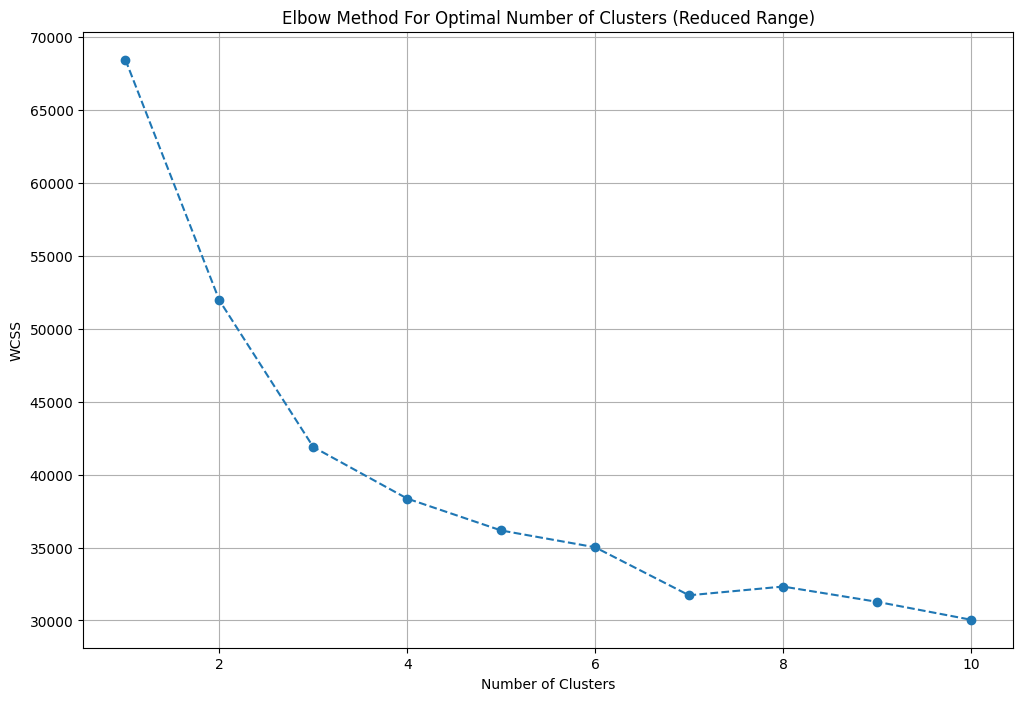

In [59]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [60]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [61]:
df = df.iloc[:,:-18]

In [62]:
df['furnishing_type'] = cluster_assignments

In [63]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3018,"['1 Water Purifier', '8 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '4 Geyser', '1 Stove', '70 Light', '7 AC', '2 TV', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '4 Bed', '5 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave']",1
2439,"['1 Water Purifier', '38 Fan', '1 Exhaust Fan', '1 Geyser', '100 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', '7 Bed', '18 Wardrobe', '1 Sofa', 'No AC', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Washing Machine']",1
994,"['1 Wardrobe', '3 Fan', '3 Light', '2 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
30,NaN,0
2902,[],0


# 5.features

In [64]:
df[['society','features']].sample(5)

,society,features
4,emaar mgf marbella,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Piped-gas', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Waste Disposal', 'Rain Water Harvesting']"
2927,tulip violet,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3409,dlf belvedere towers,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park']"
1000,signature global solera,"['Intercom Facility', 'Lift(s)', 'Park']"
2484,signature global orchard avenue,"['Power Back-up', 'Lift(s)', 'No open drainage around', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [ ]:
df['features'].isnull().sum()

In [66]:
app_df = pd.read_csv('../data/real_estate_data.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [67]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [68]:
temp_df = df[df['features'].isnull()]

In [69]:
temp_df.shape

(635, 26)

In [70]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [71]:
df.loc[temp_df.index,'features'] = x.values

In [72]:
df['features'].isnull().sum()

np.int64(481)

In [73]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [74]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [75]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1158,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2730,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3588,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
features_binary_df.shape

(3803, 130)

In [77]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

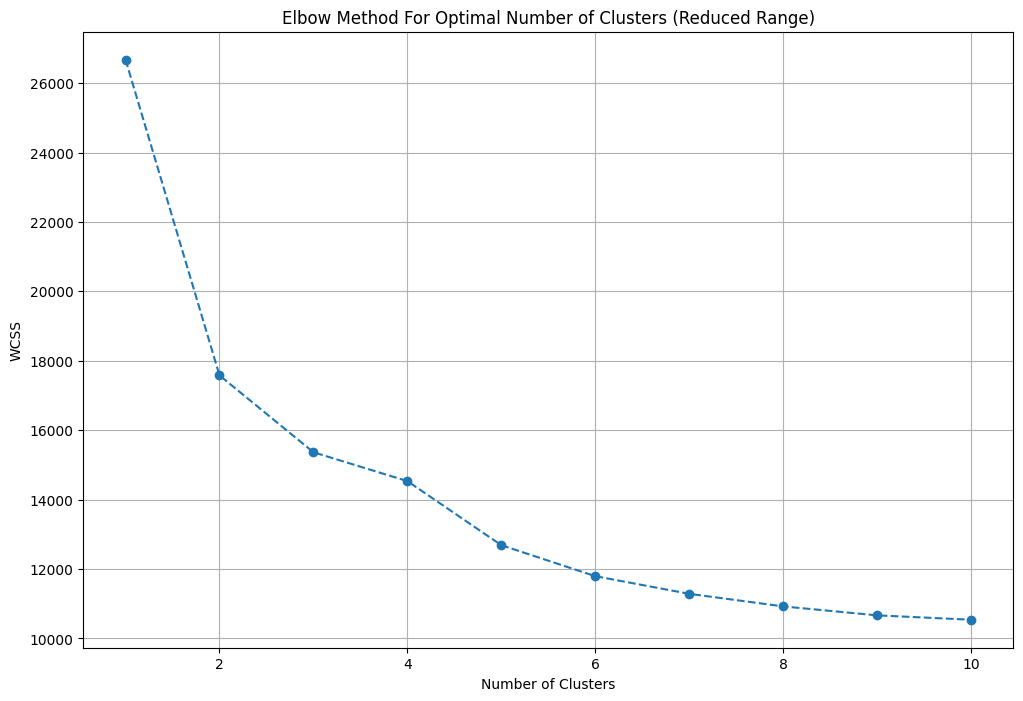

In [80]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [81]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [82]:
df['luxury_score'] = luxury_score

In [83]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,dlf the skycourt,sector 86,1.58,8190.0,1929.0,Super Built up area 1929(179.21 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.),3,3,1,pooja room,16.0,North,Relatively New,"['Sapphire 83 Mall', 'NH-8, Imt Manesar', 'Rao Bharat Singh International School', 'DPG Institute of Technology', 'Aarvy Healthcare', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'Aapno Ghar', 'National Tennis Academy Sector 98']","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '5 AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1929.0,1750.0,1450.0,0,0,0,1,0,2,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",152
1,flat,ss the leaf,sector 85,1.20,7317.0,1640.0,Super Built up area 1640(152.36 sq.m.),2,2,3,not available,12.0,South,Relatively New,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'NH 08', 'Pataudi Road', 'Delhi Public School Sector 84', 'DPG Institute of Technology', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park', 'Nakhrola Stadium Sector 81A']","['5 Fan', '1 Exhaust Fan', '2 Geyser', '10 Light', '4 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '2 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1640.0,NaN,NaN,0,0,0,0,0,2,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, No open drainage around, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Den

In [84]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [85]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf the skycourt,sector 86,1.58,8190.0,1929.0,Super Built up area 1929(179.21 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.),3,3,1,16.0,North,Relatively New,1929.0,1750.0,1450.0,0,0,0,1,0,2,152
1,flat,ss the leaf,sector 85,1.20,7317.0,1640.0,Super Built up area 1640(152.36 sq.m.),2,2,3,12.0,South,Relatively New,1640.0,NaN,NaN,0,0,0,0,0,2,157
2,house,ansals florence villa,sector 57,6.00,22222.0,2700.0,Plot area 300(250.84 sq.m.),4,5,2,2.0,NaN,Old Property,NaN,2700.0,NaN,0,1,0,1,0,2,20
3,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,13.0,North,Relatively New,NaN,NaN,34401.0,0,0,0,0,0,0,68
4,house,emaar mgf marbella,sector 66,NaN,NaN,NaN,Plot area 500(418.06 sq.m.),5,7,3+,2.0,NaN,Moderately Old,NaN,500.0,NaN,1,1,1,1,0,2,70


In [86]:
df.shape

(3803, 23)

In [87]:
df.to_csv('../data/gurgaon_properties_cleaned_v2.csv',index=False)